In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

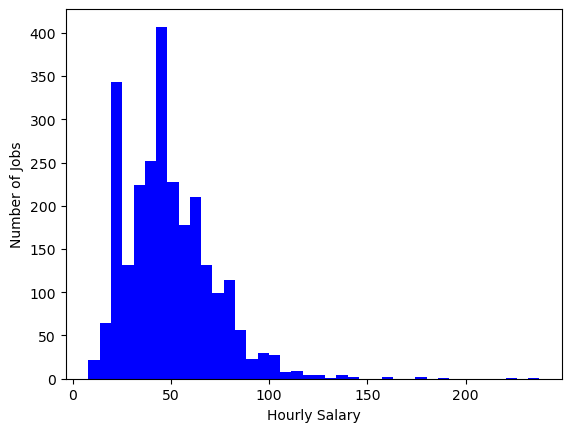

In [4]:
#Data Scientist Hourly Salaries
#Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS = df_DS.dropna(subset = ['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind= 'hist', bins = 40, color= 'blue')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

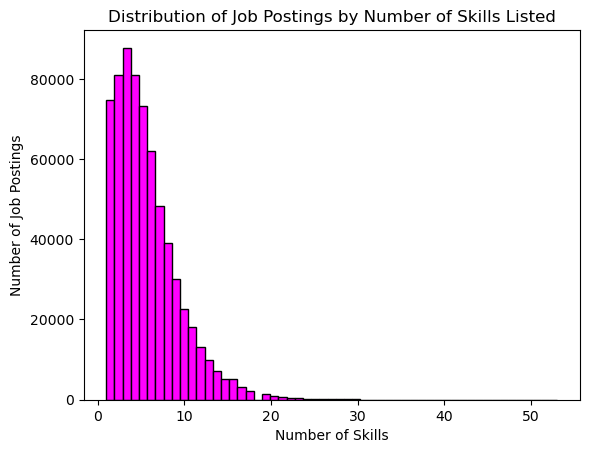

In [ ]:
#JobPostings by Number of Skills
#Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column

df_skills = df.dropna(subset = ['job_skills']).copy()

#df_skills['num_skills'] = df_skills['job_skills'].apply(len)
#df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

df_skills['job_skills'].str.len().plot(kind = 'hist', bins = 55, color = 'magenta', edgecolor = 'black')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()

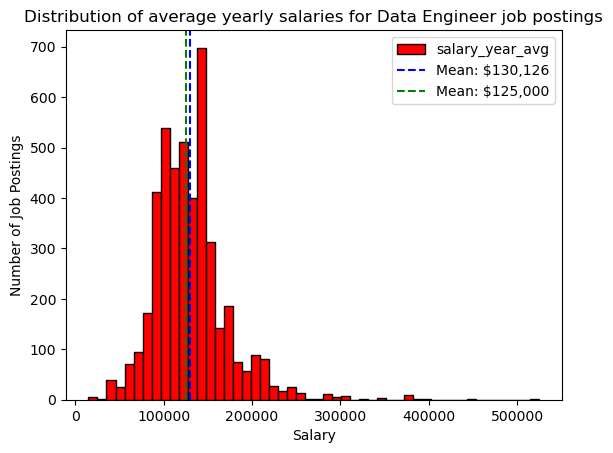

In [23]:
#Data Engineer Salaries
#Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

#Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

df_DE = df_DE.dropna(subset = ['salary_year_avg'])
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind = 'hist', bins = 50, color = 'red', edgecolor = 'black')
plt.xlabel('Salary')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of average yearly salaries for Data Engineer job postings')
plt.axvline(mean_salary, color = 'blue', linestyle = '--', label = f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color = 'green', linestyle = '--', label = f'Mean: ${median_salary:,.0f}')
plt.legend()
plt.show()